#Project-1: Implement KNN classifier to predict thyroid disease
Objective: Implement KNN on the provided dataset and evaluate the performance of a classification
model.
Instructions:
1. Load the Breast Cancer dataset from Thyroid_Diff.csv. (source: dataset folder in the google
classroom)
2. Preprocessed the dataset by the following orders:
● Handling Missing Values: Ensure there are no missing values. If there are any, decide on
a strategy to handle them (e.g., imputation).
● Encoding: Convert categorical variables into numerical values.
● Identify outliers if any in the dataset.
● Normalization: Normalize numerical features.
● Splitting: Split the dataset into training and testing sets for model evaluation.
3. Train KNN classifiers with different neighbors until you obtain the best accuracy.
4. Evaluate the model&#39;s performance using classification metrics.
5. Plot the ROC curve.

In [ ]:
# Read the dataset
import pandas as pd
original_dataset = pd.read_csv('/content/Thyroid_Diff.csv')
df = original_dataset
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [ ]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df['Smoking'] = label.fit_transform(df['Smoking'])
df['Hx Smoking'] = label.fit_transform(df['Hx Smoking'])
df['Hx Radiothreapy'] = label.fit_transform(df['Hx Radiothreapy'])
df['Thyroid Function'] = label.fit_transform(df['Thyroid Function'])

df['Physical Examination'] = label.fit_transform(df['Physical Examination'])
df['Adenopathy'] = label.fit_transform(df['Adenopathy'])
df['Pathology'] = label.fit_transform(df['Pathology'])
df['Focality'] = label.fit_transform(df['Focality'])
df['Risk'] = label.fit_transform(df['Risk'])

df['T'] = label.fit_transform(df['T'])
df['N'] = label.fit_transform(df['N'])
df['M'] = label.fit_transform(df['M'])
df['Stage'] = label.fit_transform(df['Stage'])
df['Response'] = label.fit_transform(df['Response'])
df['Recurred'] = label.fit_transform(df['Recurred'])

df.astype(str).apply(LabelEncoder().fit_transform)
df[:3]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0


In [ ]:
df.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,1.950392,2.561358,2.924282,2.550914,0.644909,1.566580,2.206266,0.543081,0.046997,0.242820,1.574413,0.281984
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.630917,1.350110,1.172106,0.890257,0.479167,0.643233,1.344667,0.857732,0.211910,0.773274,0.917585,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.500000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,1.000000,2.000000,6.000000,2.000000,1.000000,4.000000,3.000000,1.000000


<Axes: >

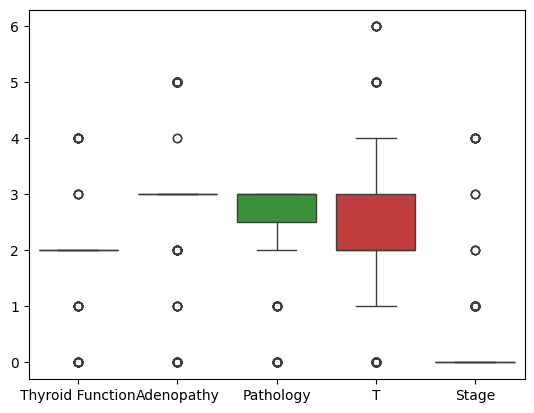

In [ ]:
# Box Plot for identifying outliers
import seaborn as sns
sns.boxplot(df[['Thyroid Function', 'Adenopathy', 'Pathology', 'T', 'Stage']])

In [ ]:
# normalization using z-score
from scipy.stats import zscore
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler

data = df.values[:, :-1]
scaler = zscore(data)

normalized_data = DataFrame(scaler)
normalized_data[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.917439,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,0.325319,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,0.464420
1,-0.454315,-0.477037,-0.383023,3.560698,-0.136444,0.078732,-1.157980,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
2,-0.718957,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
3,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
4,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,-1.157980,0.064684,-0.619635,-1.347656,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824


In [ ]:
# Assigning the column names
normalized_data.columns = ['Age',	'Gender',	'Smoking', 'Hx Smoking',	'Hx Radiothreapy',	'Thyroid Function',	'Physical Examination',	'Adenopathy',	'Pathology',	'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
normalized_data[:5]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,-0.917439,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,0.325319,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,0.464420
1,-0.454315,-0.477037,-0.383023,3.560698,-0.136444,0.078732,-1.157980,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
2,-0.718957,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
3,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
4,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,-1.157980,0.064684,-0.619635,-1.347656,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824


In [ ]:
# Joining the target feature
import pandas as pd
d=df.iloc[:, -1]
d=pd.DataFrame(d,columns =['Recurred'])
result_data = normalized_data.join(d)
result_data[:4]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,-0.917439,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,0.325319,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,0.464420,0
1,-0.454315,-0.477037,-0.383023,3.560698,-0.136444,0.078732,-1.157980,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,0
2,-0.718957,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,0
3,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824,0


In [ ]:
# defining classification model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def evaluation_analysis(true_label,predicted):

# Compute accuracy, precision, recall, and F1-score
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  precision_micro = precision_score(y_test, y_pred, average='micro')
  recall = recall_score(y_test, y_pred, average='macro')
  recall_micro = recall_score(y_test, y_pred, average='micro')
  f1 = f1_score(y_test, y_pred, average='macro')
  f1_micro = f1_score(y_test, y_pred, average='micro')
  auc_roc = roc_auc_score(y_test, y_pred)

  print(f"Accuracy: {accuracy:.2f}")
  print(f"\nPrecision (macro): {precision:.2f}")
  print(f"Precision (micro): {precision_micro:.2f}")
  print(f"Recall (macro): {recall:.2f}")
  print(f"Recall (micro): {recall_micro:.2f}")
  print(f"F1-Score (macro): {f1:.2f}")
  print(f"F1-Score (micro): {f1_micro:.2f}")
  print(f"AUC_ROC Score : {auc_roc:.2f}")

Accuracy: 0.92

Precision (macro): 0.93
Precision (micro): 0.92
Recall (macro): 0.86
Recall (micro): 0.92
F1-Score (macro): 0.89
F1-Score (micro): 0.92
AUC_ROC Score : 0.86

Confusion Matrix:
 [[57  1]
 [ 5 14]]


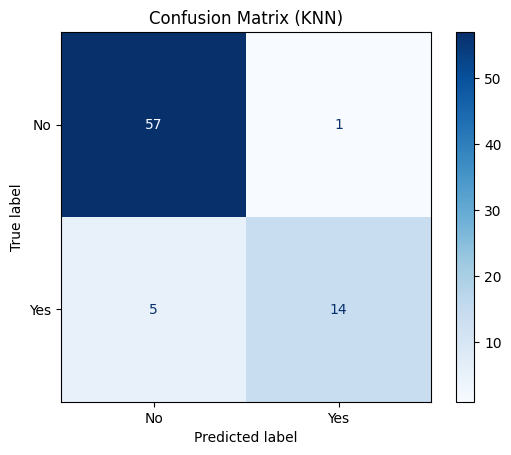

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Using all the columns for classifier
X = result_data.drop('Recurred', axis=1)
y = result_data['Recurred']

# Confusion matrix target label names
target_names = {0: 'No', 1: 'Yes'}
display_labels = [target_names[label] for label in sorted(target_names)]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the model
knn.fit(X_train, y_train)

# Predict the labels for test set
y_pred = knn.predict(X_test)

# Compute accuracy, precision, recall, F1-score and AUC_ROC
evaluation_analysis(y_test,y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Display the confusion matrix using Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (KNN)')
plt.show()

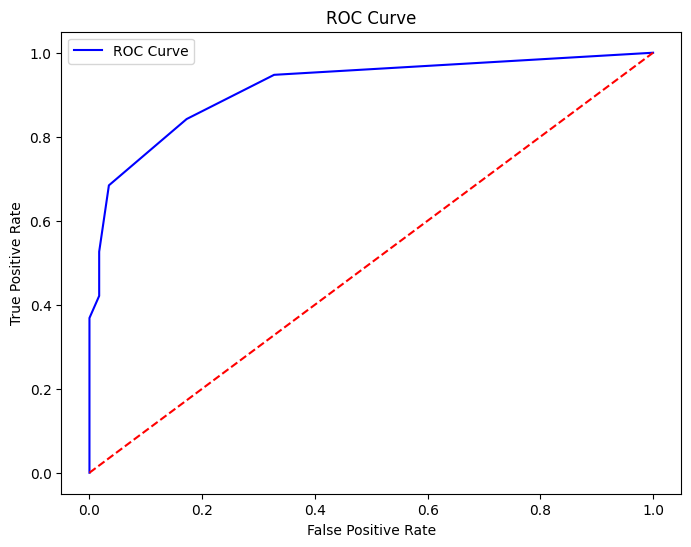

ROC AUC Score: 0.92


In [ ]:
# Plot the ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

X = df.iloc[:, :-1]
y = df['Recurred']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a classifier
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

# Getting predicted probabilities
y_proba = clf.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')